In [128]:
import numpy as np
import pandas as pd

In [129]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [131]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Only two rows in dataset has NaN in Embarked, thus those two rows are being dropped.

In [132]:
data_clean=data.dropna(subset=['Embarked'])

In [133]:
data_clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: xlabel='Age'>

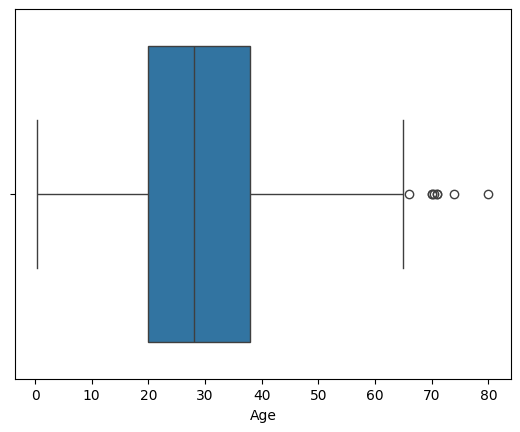

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data_clean['Age'])

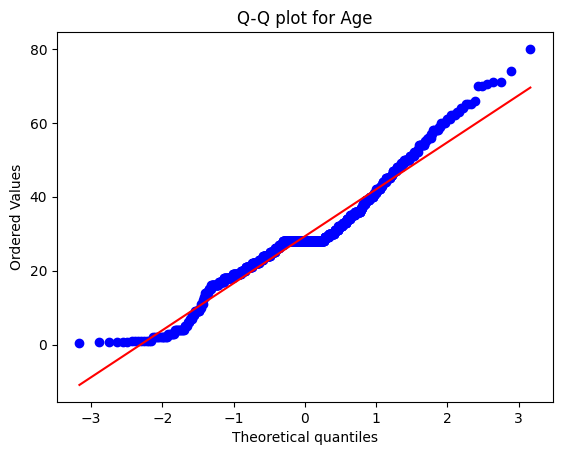

In [158]:
from scipy.stats import probplot
probplot(data_clean['Age'].dropna(),dist='norm',plot=plt)
plt.title('Q-Q plot for Age')
plt.show()

In [136]:
data_clean['Age'].skew()

np.float64(0.3888806178753708)

<Axes: >

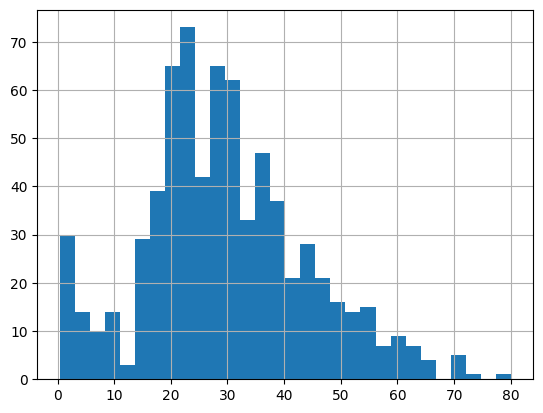

In [137]:
data_clean['Age'].hist(bins=30) 

<Axes: xlabel='Age', ylabel='Count'>

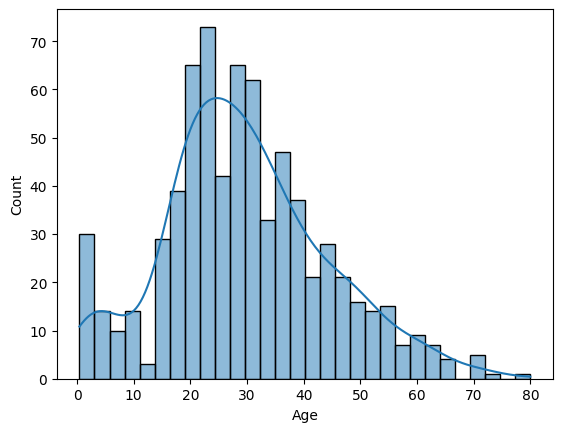

In [138]:
sns.histplot(data_clean['Age'],bins=30,kde=True)

From all the plots, we can see that Age is slightly positively skewed, thus we can impute with Mean, but we are doing so with Median to be on the safer side.
Another method to impute can be by using the title in the name to impute, but haven't implemented it.

In [139]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data_clean['Age']=imputer.fit_transform(data_clean[['Age']])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10028\1737521303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Age']=imputer.fit_transform(data_clean[['Age']])


In [140]:
data_clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Cabin has 79% missing values, and thus we are dropping the column itself, unless it is significant to the analysis or model. For now, I am dropping the column.

In [141]:
data_clean_new=data_clean.drop('Cabin',axis=1)

In [142]:
data_clean_new.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [143]:
data_clean_new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [144]:
data_clean_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Here, we are making two other columns to depict, S, C and Q using binary values (manual one hot encoding)

In [145]:
data_clean_new['S']=(data_clean_new['Embarked']=='S').astype(int)
data_clean_new['C']=(data_clean_new['Embarked']=='C').astype(int)


In [146]:
print(data_clean_new[['S','C']])

     S  C
0    1  0
1    0  1
2    1  0
3    1  0
4    1  0
..  .. ..
886  1  0
887  1  0
888  1  0
889  0  1
890  0  0

[889 rows x 2 columns]


Here, I am creating a new column called Gender which depicts 1 as Male and 0 as Female using manual LabelEncoding


In [147]:
data_clean_new['Gender']=(data_clean_new['Sex']=='male').astype(int)

In [148]:
data_clean_new=data_clean_new.drop(['Sex','Embarked'],axis=1)
data_clean_new

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,S,C,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1


Scaling the Fare and Age as they are numerical, non categorical columns. Fare has alot of outliers thus we are doing log transform and then scaling.

In [149]:
from sklearn.preprocessing import StandardScaler

<Axes: ylabel='Fare'>

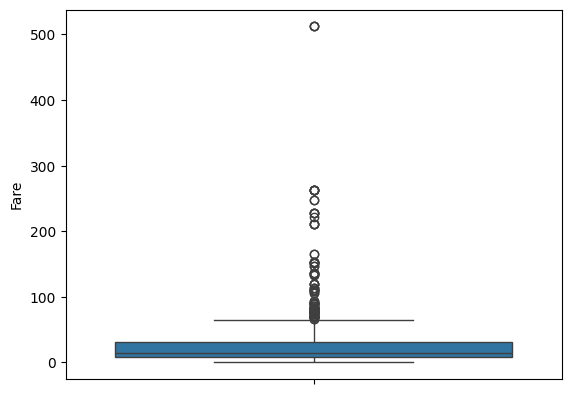

In [150]:
sns.boxplot(data=data_clean_new['Fare'])

In [151]:
data_clean_new['Fare']=np.log1p(data_clean_new['Fare'])

In [152]:
scaler=StandardScaler()
data_clean_new[['Age','Fare']]=scaler.fit_transform(data_clean_new[  ['Age','Fare']])

In [153]:
data_clean_new

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,S,C,Gender
0,1,0,3,"Braund, Mr. Owen Harris",-0.563674,1,0,A/5 21171,-0.877591,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.669217,1,0,PC 17599,1.366380,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.255451,0,0,STON/O2. 3101282,-0.796281,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.438050,1,0,113803,1.066796,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0.438050,0,0,373450,-0.781901,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.178396,0,0,211536,-0.330815,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",-0.794841,0,0,112053,0.491068,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.101340,1,2,W./C. 6607,0.245663,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",-0.255451,0,0,111369,0.491068,0,1,1


In [154]:
box_plot_cols=['Age','Fare']

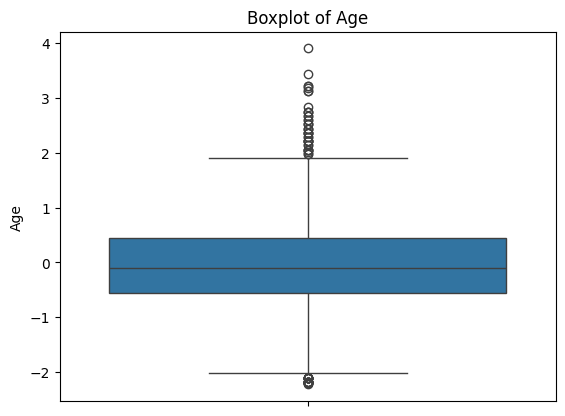

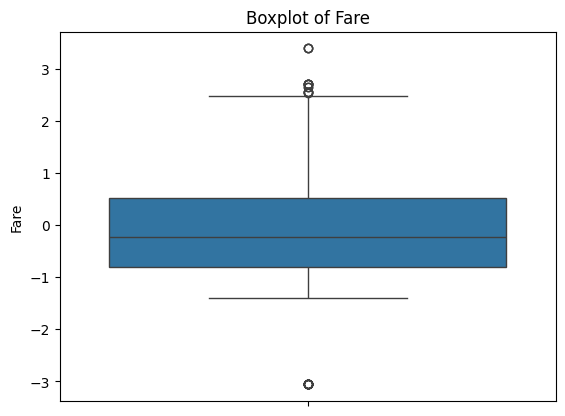

In [155]:
for i in box_plot_cols:
    sns.boxplot(data=data_clean_new[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

Here, we are using Inter Quartile Range to remove the outliers, removing those that are greater than Q1-1.5*IQR and lesser than Q3+1.5*IQR

In [156]:
for i in ['Age','Fare']:
    q1=data_clean_new[i].quantile(0.25)
    q3=data_clean_new[i].quantile(0.75)
    iqr=q3-q1
    data_clean_new=data_clean_new[(data_clean_new[i]>=q1-1.5*iqr)&(data_clean_new[i]<=q3+1.5*iqr)]

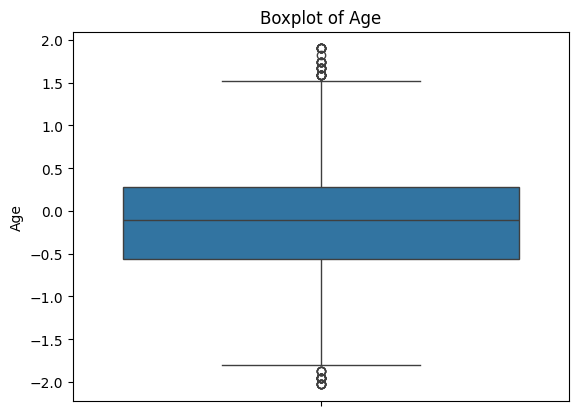

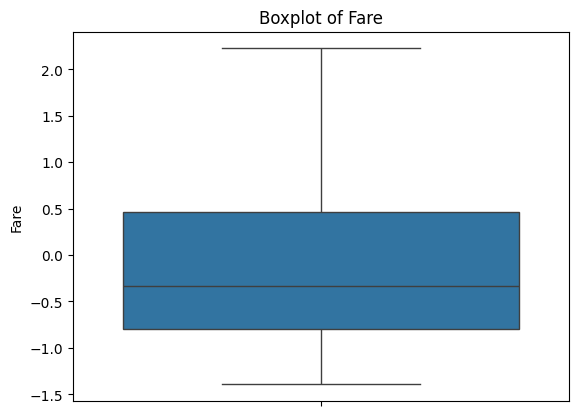

In [157]:
for i in box_plot_cols:
    sns.boxplot(data=data_clean_new[i])
    plt.title(f'Boxplot of {i}')
    plt.show()